In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
# Load the training dataset
train_data = pd.read_csv("fraudTrain.csv")

train_data.columns =['ID','trans_date_trans_time','cc_num','merchant','category','amt','first','last','gender','street','city',
                     'state','zip','lat','long','city_pop','job','dob','trans_num','unix_time','merch_lat','merch_long',
                     'is_fraud']
train_data.dropna(inplace=True)
train_data.head()

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [41]:
# Load the test dataset
test_data = pd.read_csv("fraudTest.csv")

test_data.columns =['ID','trans_date_trans_time','cc_num','merchant','category','amt','first','last','gender','street','city',
                    'state','zip','lat','long','city_pop','job','dob','trans_num','unix_time','merch_lat','merch_long',
                    'is_fraud']
test_data.dropna(inplace=True)
test_data.head()

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [42]:
# Drop unnecessary columns (like 'trans_date_trans_time', 'cc_num', etc.)
drop_columns = ['ID','trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender',
                'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time',
                'merch_lat', 'merch_long']
train_data = train_data.drop(drop_columns, axis=1)
test_data = test_data.drop(drop_columns, axis=1)

# Separate target variable
train_labels = train_data['is_fraud']
test_labels = test_data['is_fraud']

train_data = train_data.drop('is_fraud', axis=1)
test_data = test_data.drop('is_fraud', axis=1)


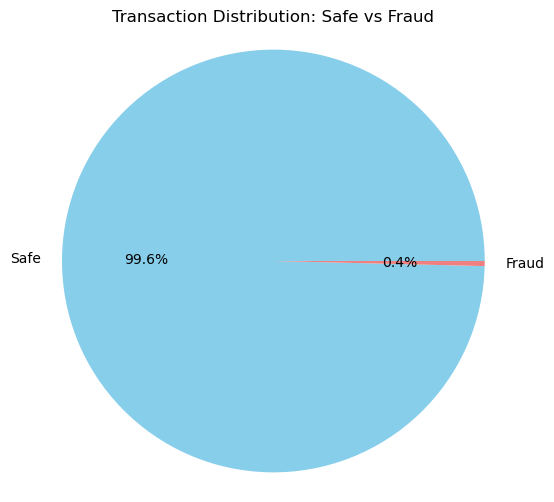

In [43]:
# Create a pie chart
fraud_count = test_labels.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_count, labels=['Safe', 'Fraud'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Transaction Distribution: Safe vs Fraud")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [44]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(train_data, train_labels)

RandomForestClassifier(random_state=42)

In [48]:
# Predict on the test data
predictions = clf.predict(test_data)

# Calculate accuracy
accuracy = round(accuracy_score(test_labels, predictions)*100,2)
print("Accuracy:", accuracy)

# Get classification report with precision, recall, and F1-score
report = classification_report(test_labels, predictions)
print("Classification Report:\n", report)

Accuracy: 99.54
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.34      0.20      0.25      2145

    accuracy                           1.00    555719
   macro avg       0.67      0.60      0.63    555719
weighted avg       0.99      1.00      0.99    555719

